# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Drop variabel NaN
house.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [4]:
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df = house.dropna(axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [44]:
# Memisahkan data menjadi numerikal & kategorikal
num_colms = df._get_numeric_data().columns
df_numeric = df[num_colms]
df_numeric.dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [7]:
df_categorical = df.drop(num_colms, axis = 1)
df_categorical.head

<bound method NDFrame.head of      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... ExterCond Foundation Hea

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

Text(0.5, 1.0, 'Utilities')

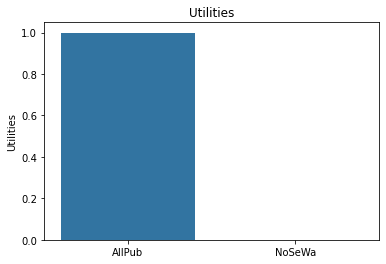

In [9]:
sns.barplot(x = df_categorical['Utilities'].value_counts().index,
            y = df_categorical['Utilities'].value_counts(normalize = True))
plt.title('Utilities')

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 1.0, 'House Style')

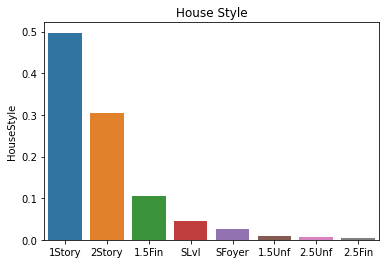

In [12]:
sns.barplot(x = df_categorical['HouseStyle'].value_counts().index,
            y = df_categorical['HouseStyle'].value_counts(normalize = True))
plt.title('House Style')

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

Text(0.5, 1.0, 'Exterior Quality')

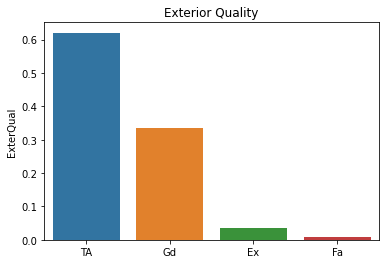

In [11]:
sns.barplot(x = df_categorical['ExterQual'].value_counts().index,
            y = df_categorical['ExterQual'].value_counts(normalize = True))
plt.title('Exterior Quality')

#### **Analisis tentang variabel kategorikal**

* Dapat lihat bahwa data Utilities, HouseStyle, dan ExterQual memiliki data yang imbalanced.
* Pada Ultilites terlihat bahwa semua rumah yang dijual memiliki fasilitas yang lengkap.
* Pada HouseStyle terlihat 50% rumah yang dijual memiliki 1 lantai, 30% rumah yang dijual memiliki 2 lantai, sisanya seperti rumah yang memiliki 2 lantai tapi belum selesai.
* Pada ExterQual terlihat 60% rumah yang dijual memiliki exterior dengan kualitas Average, 30% rumah yang dijual memiliki exterior dengan kualitas Good, dan sedikit rumah dijual yang memiliki kualitas exterior Excellent atau Fair.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Mean:  180921.19589041095
Median:  163000.0
Standard Deviasi:  79442.50288288663


Text(0, 0.5, 'Houses')

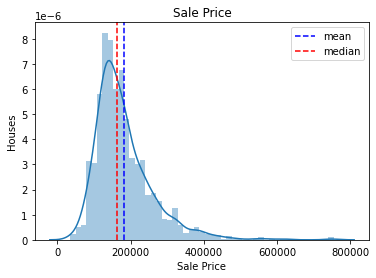

In [28]:
x = df_numeric['SalePrice']
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Houses')

#### **Analisis tentang variabel `SalePrice`**

* Distribusi Right-Skewed
* Kebanyakan data dalam range sekitar 100000 sampai 300000
* Nilai selalu positif namum ketika dimasukkan kedalam ML bisa menjadi negatif
* Akan dilakukan transformari dengan menggunakan log-scale

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Mean:  1515.463698630137
Median:  1464.0
Standard Deviasi:  525.4803834232027


Text(0, 0.5, 'Houses')

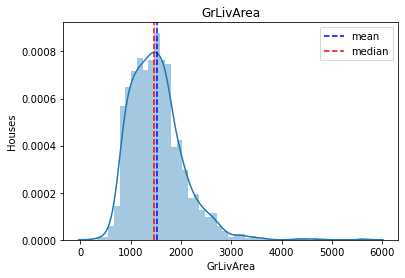

In [29]:
x = df_numeric['GrLivArea']
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Houses')

#### **Analisis tentang variabel `GrlivArea`**

* Distribusi Right-skewed
* Kebanyakan data tersebar dalam range 1000 sampai 2000
* Nilai selalu positif namun ketika dimasukkan kedalam ML dapat menghasilkan nilai negatif
* Akan dilakukan transformasi dengan menggunakanlog-scale

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Mean:  472.9801369863014
Median:  480.0
Standard Deviasi:  213.80484145338076


Text(0, 0.5, 'Houses')

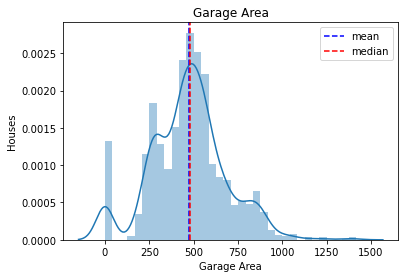

In [30]:
x = df_numeric['GarageArea']
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Houses')

In [54]:
print('number of nonzero values: ',np.sum(df_numeric['GarageArea'] != 0))
print('number of nonzero values: ',np.sum(df_numeric['GarageArea'] == 0))

number of nonzero values:  1379
number of nonzero values:  81


#### **Analisis tentang variabel `GarageArea`**

* Data memiliki banyak value 0
* Dari data ini kita mendapatkan bahwa 'tidak semua rumah memiliki garasi'
* Dari pernyataan diatas kita akan melakukan analisis lebih dalam lagi
* Analisis yang dilakukan adalah klustering antara rumah mempunyai garasi danrumah tanpa garasi

## Pemrosesan Data Variabel Numerikal

Mean:  5.221978956475622
Median:  5.212187604403958
Standard Deviasi:  0.17347974217176843


Text(0, 0.5, 'Houses')

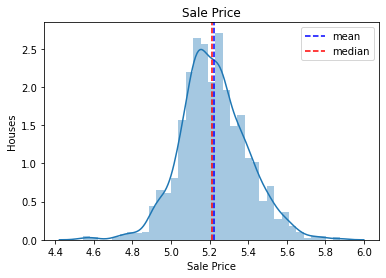

In [27]:
x = np.log10(df_numeric['SalePrice'])
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Houses')

Mean:  3.1563543103897764
Median:  3.165541076722373
Standard Deviasi:  0.14485910869663873


Text(0, 0.5, 'Houses')

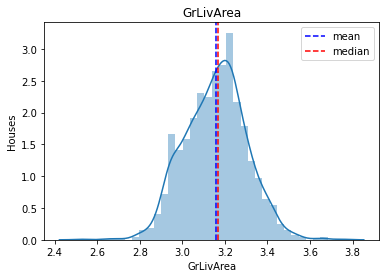

In [31]:
x = np.log10(df_numeric['GrLivArea'])
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Houses')

Mean:  500.76214648295866
Median:  484.0
Standard Deviasi:  185.68051979433156


Text(0, 0.5, 'Houses')

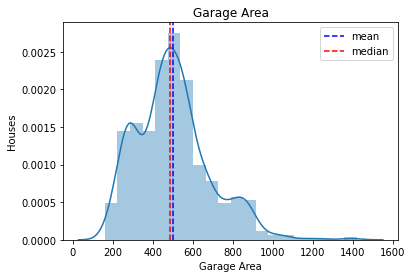

In [52]:
x = df_numeric['GarageArea'][df_numeric['GarageArea'] > 0]
sns.distplot(x, axlabel = x.name, bins = 20)
line1 = plt.axvline(x.mean(), color = 'b', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean: ', x.mean())
print('Median: ', x.median())
print('Standard Deviasi: ', x.std())
plt.show
plt.title('Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Houses')

#### **Penjelasan dan analisis tentang pemrosesan data**

* Dengan melakukan pemrosesan data untuk SalePrice, GrLivArea, dan GarageArea distribusi data terlihat lebih baik dan masuk akal

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

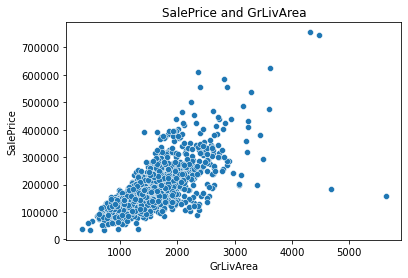

In [72]:
ax = sns.scatterplot(y = df_numeric['SalePrice'], x= df_numeric['GrLivArea'])
plt.title('SalePrice and GrLivArea')
plt.show()

In [58]:
rLivArea = np.corrcoef(x = df_numeric['GrLivArea'], y = df_numeric['SalePrice'])
rLivArea

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [59]:
rLivArea[0, 1]

0.7086244776126521

In [60]:
rLivArea[1, 0]

0.7086244776126521

# `GarageArea` dengan `SalePrice`

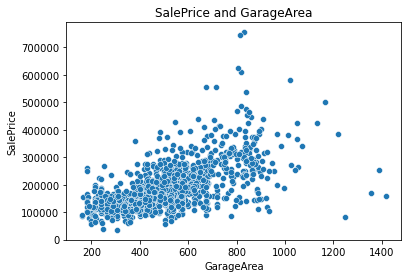

In [73]:
ax = sns.scatterplot(y = df_numeric['SalePrice'], x = df_numeric['GarageArea'][df_numeric['GarageArea'] > 0])
plt.title('SalePrice and GarageArea')
plt.show()

In [64]:
rGarageArea = np.corrcoef(x = df_numeric['GarageArea'][df_numeric['GarageArea'] > 0], y = df_numeric['SalePrice'][df_numeric['GarageArea'] > 0])
rGarageArea

array([[1.        , 0.60840528],
       [0.60840528, 1.        ]])

In [65]:
rGarageArea[0, 1]

0.608405282916835

In [66]:
rGarageArea[1, 0]

0.608405282916835

#### **Hipotesis tentang hubungan antar-variabel**

* Dapat dilihat bahwa variabel GrLivArea memiliki korelasi positif dengan variabel SalePrice.
* Namun, dapat terlihat bahwa data memiliki kemungkinan anomali yaitu titik yang berada pada ujung kanan dan juga pada paling atas
* Untuk variabel GarageArea memiliki korelasi positif dengan variabel SalePrice.
* Pada value Garage Area dipilih value > 0 dimana hanya memilih rumah yang memiliki garasi. Ini dikarenakan normalnya rumah memiliki garasi.
* Data juga memiliki kemungkinan anomali yaitu yang berada di ujung kanan dan juga pada paling atas.
* Korelasi SalePrice dengan GrLivArea menghasilkan korelasi yang Sedang/Cukup dikarena nilai corrcoeficient yang didapat adalah 0.7
* Korelasi SalePrice dengan GarageArea menghasilkan korelasi yang Sedang/Cukup dikarenakan nilai corrcoeficient yang didapat adalah 0.6